In [23]:
import numpy as np
import random 
import matplotlib.pyplot as plt

Задаем матрицу А-переходных вероятностей

Задаем матрицу Е- матрица эмиссий

In [24]:
E = np.array([[1/6,1/6,1/6,1/6,1/6,1/6],[1/10,1/10,1/10,1/10,1/10,1/2]])

In [25]:
A=np.array([[0.95,0.05],[0.1,0.9]])

Инициализируем:

Вектор (реальных) состояний- это каким костями играл крупье

Вектор реальных наблюдений- это какие числа выпали на этих костях

In [26]:
l=900#длина последовательности.длина вектора реальных состояний
m=np.zeros((l,),dtype=int)#вектор наблюдений
k=np.zeros((l,),dtype=int)#вектор состояний

1.Задаем вектор стационарного распределения (s)

In [27]:
s=np.array([2/3,1/3])

2. Разыгрываем рандомное число от 0 до 1


In [28]:
x=np.random.random()
r=np.random.random()

3. Определяем , если x<2/3, то честно.

In [29]:
if x<2/3:
    k[0]=0
else:
    k[0]=1

Задали нулевое состояние.
Исходя из него находит первое наблюдение 

In [30]:
f=0
for i in range(6):
    f+=E[k[0], i]
    if r<f:
        m[0]=i+1
        break;
    

Задаем вектора действительных состояний и наблюдений:

In [32]:
for j in range(1,l):
    x=np.random.random()
    r=np.random.random()
    f1=0#флаг перехода
    f2=0
    for i in range(2):
        f1+=A[k[j-1],i]
        if x<f1:
            k[j]=i
            break;
    for i in range(6):
        f2+=E[k[j], i]
        if r<f2:
            m[j]=i+1
            break;
print(k,m,sep='\n')

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 

# Алгоритм Витерби

In [33]:
V=np.zeros((2,l))
P=np.zeros((2,l), dtype = int)
F=np.zeros((l,), dtype = int)

In [34]:
V[:,0]=s*E[:,m[0]-1]#нулевой столбец

In [35]:
for i in range(1,l):
    for j in range(2):
        V[j,i]=np.max(V[:,i-1]*A[:,j]*E[:,m[i]-1])
        P[j,i]=np.argmax(V[:,i-1]*A[:,j]*E[:,m[i]-1])
    V[:,i]/=np.max(V[:,i])
F[-1]=np.argmax(V[:,-1])
for i in range(l-2,-1,-1):
    F[i] = P[F[i+1],i+1]
print('k( массив состояний):',k,'m (массив наблюдений):',m,'F(наиболее вероятные состояния согласно алгоритму Витерби:',F,sep='\n')   

k( массив состояний):
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 

In [36]:
cnt=0
for i in range(l):
    if k[i]==F[i]:
        cnt=cnt+1
print('Количество совпадений:', cnt,'из',l,'бросков')


Количество совпадений: 717 из 900 бросков


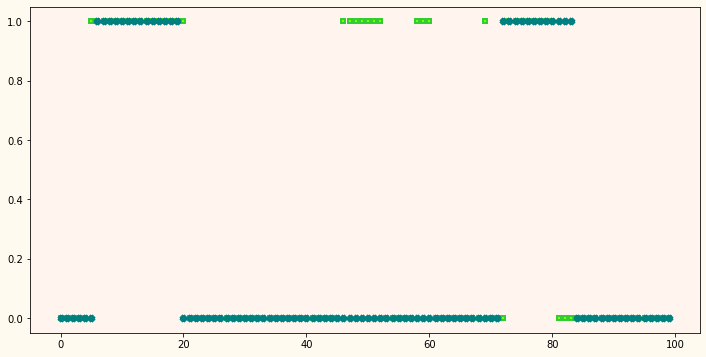

In [61]:
fig, ax = plt.subplots()
k1=k[:100]
F1=F[:100]
ax.plot(k1,
        marker = 's',
        markersize = 4,
        color = 'lime',
        linewidth = 0.0,
        markerfacecolor = 'lawngreen',
        markeredgecolor = 'limegreen',
        markeredgewidth = 2)
ax.plot(F1,
        marker = 'X',
        markersize = 4,
        color = 'teal',
        linewidth = 0.0,
        markerfacecolor = 'greenyellow',
        markeredgecolor = 'teal',
        markeredgewidth = 3)

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()


# Алгоритм апостериорного дешифрования


1. Forward. Алгоритм для работы прямым ходом

In [63]:
Df=np.zeros((2,l))#Итоговая матрица
NKf=np.zeros((l,))#вектор нормировочных коэфициентов
Df[:,0]=s*E[:,m[0]-1]#нулевой столбец, где S - стационарное распределение
NKf[0]=max(Df[:,0])
Df[:,0]/=NKf[0]

In [64]:
for i in range(1,l):
    for j in range(2):
        Df[j,i]=np.sum(Df[:,i-1]*A[:,j])*E[j,m[i]-1]
    NKf[i]=np.max(Df[:,i])
    Df[:,i]/=NKf[i]
NVNf=np.sum(Df[:,-1])
print('Итоговая матрица (нормированная):',Df,'Нормированная вероятность наблюдения:',NVNf,'Вектор нормировочных коэффициентов:',NKf,sep='\n')   

Итоговая матрица (нормированная):
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.3        0.19591837 0.14005473 ... 0.22747692 0.1571194  0.11892208]]
Нормированная вероятность наблюдения:
1.1189220848030215
Вектор нормировочных коэффициентов:
[0.11111111 0.16333333 0.16159864 0.16066758 0.16015956 0.15987988
 0.15972514 0.1596393  0.19486749 0.15042721 0.30686927 0.46374958
 0.09111857 0.10717816 0.41487622 0.46041113 0.45448533 0.09049588
 0.45894224 0.09079858 0.46155172 0.0909731  0.09930563 0.1738762
 0.16685774 0.16343067 0.1616503  0.16069559 0.16017493 0.15988837
 0.1653159  0.16263881 0.16122825 0.16046619 0.1600489  0.15981872
 0.15969123 0.15962047 0.15958114 0.15955927 0.1595471  0.1643683
 0.16214477 0.16096285 0.16032131 0.15996912 0.15977457 0.2050103
 0.14409958 0.31862257 0.10075144 0.17366071 0.25242924 0.46651519
 0.45649833 0.09063333 0.09202586 0.15571812 0.16843611 0.16422627
 0.16207024 0.17128002 0.16562277 0.16279759 0.16131321 0.1

In [65]:
Db=np.zeros((2,l))#Итоговая/результирующая матрица
NKb=np.zeros((l,))#вектор нормировочных коэфициентов
Db[:,-1]=np.array([1,1])
NKb[-1]=1

In [66]:
for i in range (l-2,-1,-1):
    for j in range (2):
        Db[j,i]= np.sum(Db[:,i+1]*A[j]*E[:,m[i+1]-1])
    NKb[i]=max(Db[:,i])
    Db[:,i]/=NKb[i]
NVNb=np.sum(Db[:,0]*s*E[:,m[0]-1])
print('Итоговая матрица (нормированная):',Db,'Нормированная вероятность наблюдения:',NVNb,'Вектор нормировочных коэффициентов:',NKb,sep='\n') 

Итоговая матрица (нормированная):
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.40418608 0.53796276 0.78468245 ... 0.46684908 0.65306122 1.        ]]
Нормированная вероятность наблюдения:
0.12458398055844597
Вектор нормировочных коэффициентов:
[0.16102315 0.16225675 0.13169141 0.0977029  0.09404917 0.09182191
 0.45257612 0.45476761 0.09225149 0.45382173 0.45843375 0.09450771
 0.09209562 0.453369   0.45709442 0.42529927 0.11145073 0.25521462
 0.16218378 0.16444272 0.15957385 0.15960735 0.15966762 0.15977616
 0.15997199 0.16032651 0.16097237 0.16216244 0.164402   0.15955921
 0.15958104 0.15962029 0.15969091 0.15981813 0.16004784 0.16046426
 0.16122472 0.16263221 0.1185847  0.23783966 0.16182612 0.15080832
 0.09907793 0.0949156  0.09234048 0.45408063 0.45920319 0.09499532
 0.46194243 0.09677286 0.09347204 0.45739857 0.40531426 0.16534065
 0.1598973  0.16019111 0.16072509 0.16170472 0.15724346 0.1737423
 0.16052022 0.16132747 0.16282427 0.11284003 0.09638385 

В результате умножения вероятности наблюдения на нормировки получаем маленькое число, которое уходит в ноль, поэтому используем логарифмическую функцию.

В таком случае вместо умножения становится сложение логарифмов.

Вместо деления- вычитыние

In [67]:
Itog = np.zeros(l)
Itog0=np.zeros(l)
for i in range(l):
    Itog0[i] = np.log(Df[0][i]) + sum(np.log(NKf[:i+1])) + np.log(Db[0][i]) + sum(np.log(NKb[i:])) - np.log(NVNf) - sum(np.log(NKf))
Itog=np.exp(Itog0)
print('Матрица, определяющая вероятность состояний:',Itog,sep='\n')

Матрица, определяющая вероятность состояний:
[0.89185713 0.90465253 0.9009833  0.8795537  0.83279612 0.74419874
 0.58247452 0.29051261 0.1946275  0.17740696 0.11198986 0.10169282
 0.13390702 0.12673501 0.07764408 0.0709514  0.09846174 0.19386175
 0.23153306 0.37500773 0.44333147 0.67780258 0.80800062 0.87990335
 0.9189023  0.93876948 0.9465207  0.94489322 0.93331232 0.90768835
 0.94043656 0.95845651 0.9681117  0.97281175 0.97421643 0.97282176
 0.96813526 0.95850193 0.94051989 0.90783901 0.84891845 0.86225438
 0.85373486 0.82035133 0.75031483 0.61889286 0.37967543 0.3076831
 0.31476058 0.27564061 0.30646114 0.29188243 0.22675622 0.23134084
 0.31125021 0.56433413 0.70270231 0.77521771 0.80748821 0.81090973
 0.78669054 0.83942302 0.86177244 0.86163122 0.83894948 0.78571746
 0.68313694 0.67846599 0.63476175 0.53659064 0.5356406  0.48975694
 0.38273643 0.17678614 0.10921247 0.09727081 0.0442167  0.02827649
 0.02993123 0.05120716 0.11815688 0.13884446 0.12057543 0.14830609
 0.25599291 0.5754

In [68]:
Itog_Final=1-Itog

In [70]:
Itog_Final

array([0.10814287, 0.09534747, 0.0990167 , 0.1204463 , 0.16720388,
       0.25580126, 0.41752548, 0.70948739, 0.8053725 , 0.82259304,
       0.88801014, 0.89830718, 0.86609298, 0.87326499, 0.92235592,
       0.9290486 , 0.90153826, 0.80613825, 0.76846694, 0.62499227,
       0.55666853, 0.32219742, 0.19199938, 0.12009665, 0.0810977 ,
       0.06123052, 0.0534793 , 0.05510678, 0.06668768, 0.09231165,
       0.05956344, 0.04154349, 0.0318883 , 0.02718825, 0.02578357,
       0.02717824, 0.03186474, 0.04149807, 0.05948011, 0.09216099,
       0.15108155, 0.13774562, 0.14626514, 0.17964867, 0.24968517,
       0.38110714, 0.62032457, 0.6923169 , 0.68523942, 0.72435939,
       0.69353886, 0.70811757, 0.77324378, 0.76865916, 0.68874979,
       0.43566587, 0.29729769, 0.22478229, 0.19251179, 0.18909027,
       0.21330946, 0.16057698, 0.13822756, 0.13836878, 0.16105052,
       0.21428254, 0.31686306, 0.32153401, 0.36523825, 0.46340936,
       0.4643594 , 0.51024306, 0.61726357, 0.82321386, 0.89078

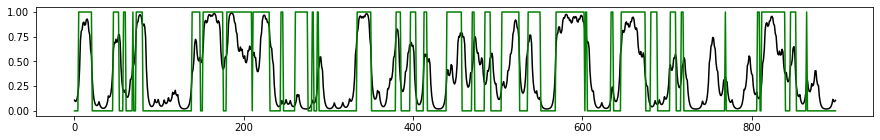

In [71]:
fig, ax = plt.subplots()
x_plot = np.arange(l)
y_plot = Itog_Final
x1_plot=np.arange(l)
y1_plot=k
ax.plot(x_plot, y_plot,c="Black")
ax.plot(x1_plot,y1_plot,c="Green")
fig.set_figwidth(15)
fig.set_figheight(2)
plt.bar
fig.set_facecolor('white')
plt.show()